# user activity analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CLEANING

In [ ]:
path = "../data/logs.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.info()
print()
df.head()

In [ ]:
print(df['network_protocol'].unique())

what is this

In [ ]:
print(df['age'].unique())

wth is that

In [ ]:
print(df['accessed_Ffom'].unique())

wtf is THAT?

ok other columns is good

In [ ]:
df['network_protocol'] = df['network_protocol'].str.strip()
print(df['network_protocol'].unique())

In [ ]:
df['accessed_Ffom'] = df['accessed_Ffom'].replace('SafFRi', 'Safari')
print(df['accessed_Ffom'].unique())

In [ ]:
df['age'] = df['age'].replace('--', np.nan)
print(df['age'].unique())

but nan in age column is bad so i prefer to convert the column to a categorical one

In [ ]:
bins = [0, 25, 35, 45, 55, 65, 150]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

df['age'] = pd.to_numeric(df['age'], errors='coerce')

df['age_cat'] = pd.cut(df['age'], bins, labels=labels, right=True).cat.add_categories(['unknown'])
df['age_cat'] = df['age_cat'].fillna('unknown')

In [4]:
df.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method,age_cat
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28.0,Female,CA,Normal,English,261.9600,No,0.0,Credit Card,26-35
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21.0,Male,AR,Normal,English,731.9400,No,0.0,Debit Card,18-25
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20.0,Male,PL,Normal,English,14.6200,No,0.0,Cash,18-25
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66.0,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card,65+
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53.0,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash,46-55


it's end.

In [ ]:
df.to_csv('../data/cleared/data.csv', index=False)

# LOAD

In [3]:
df = pd.read_csv("../data/cleared/data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               84714 non-null   float64
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
 15  age_cat           172838 non-null  object 
dtypes: float64(3), int64

# traffic analysis

## peak hours

C:\Users\whose\AppData\Local\Temp\ipykernel_4672\443966436.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hours_range'] = df.apply(lambda r: pd.date_range(r.start_hour, r.end_hour, freq='H'), axis=1)


<Axes: xlabel='hours_range'>

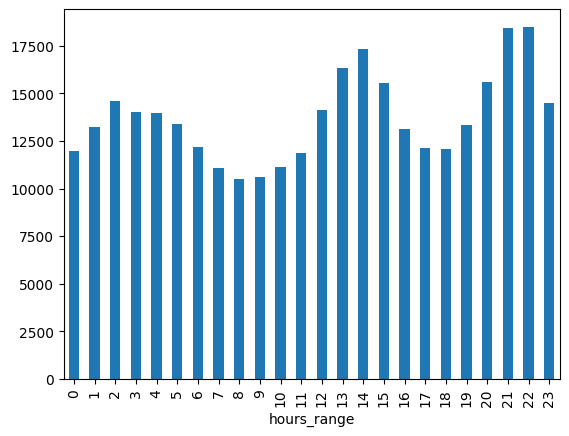

In [6]:
df['start'] = pd.to_datetime(df['accessed_date'])
df['end'] = df['start'] + pd.to_timedelta(df['duration_(secs)'], unit="s")

df['start_hour'] = df['start'].dt.floor('h')
df['end_hour'] = df['end'].dt.floor('h')

df['hours_range'] = df.apply(lambda r: pd.date_range(r.start_hour, r.end_hour, freq='H'), axis=1)

exploded = df.explode('hours_range')
peaks = exploded.groupby(exploded['hours_range'].dt.hour)['hours_range'].count()
peaks.plot(kind='bar')


## diration alalysis

In [7]:
print(df['duration_(secs)'].describe())

count    172838.000000
mean       3248.031827
std        1010.872270
min        1500.000000
25%        2371.000000
50%        3246.000000
75%        4124.000000
max        5000.000000
Name: duration_(secs), dtype: float64


<Axes: >

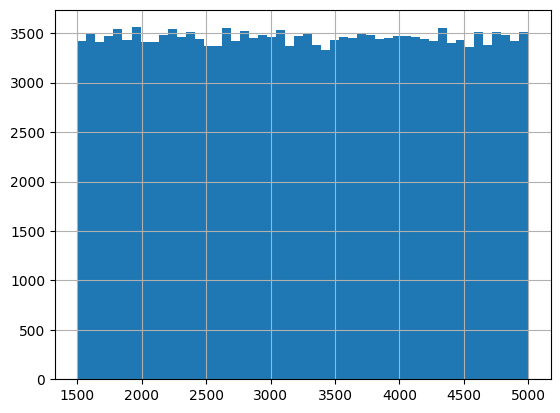

In [8]:
df['duration_(secs)'].hist(bins=50)

## correlation bytes - duration

In [9]:
r = df['duration_(secs)'].corr(df['bytes'])
print(r)

0.0045707753662710135


there is no сconnection

## Country activity

<Axes: ylabel='duration_(secs)'>

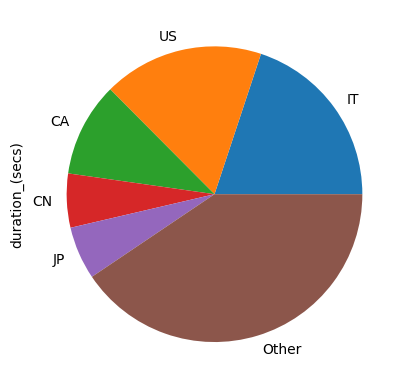

In [10]:
countries = df.groupby('country')['duration_(secs)'].sum().sort_values(ascending=False)
top5 = countries[:5]
others = countries[5:].sum()
top5['Other'] = others

top5.plot(kind='pie')

# User activity analisys

## age segment

In [12]:
print(df.groupby("age_cat")['duration_(secs)'].mean())

age_cat
18-25      3257.236070
26-35      3242.425103
36-45      3248.274242
46-55      3266.336480
56-65      3254.118333
65+        3242.537498
unknown    3243.573555
Name: duration_(secs), dtype: float64


In [15]:
print(df.groupby("age_cat")['sales'].mean())

age_cat
18-25      428.042466
26-35      422.052257
36-45      412.159561
46-55      421.773372
56-65      432.186194
65+        422.668607
unknown    400.170396
Name: sales, dtype: float64


## gender segment

In [16]:
print(df.groupby("gender")['duration_(secs)'].mean())

gender
Female     3248.200824
Male       3248.920776
Unknown    3243.504784
Name: duration_(secs), dtype: float64


In [17]:
print(df.groupby("gender")['sales'].mean())

gender
Female     453.544535
Male       452.142065
Unknown      0.000000
Name: sales, dtype: float64


In [18]:
print(df.groupby("gender")['bytes'].mean())

gender
Female     1660.155054
Male       1652.911624
Unknown     329.479919
Name: bytes, dtype: float64


## membership segment

In [19]:
print(df.groupby("membership")['duration_(secs)'].mean())

membership
Normal           3249.844034
Not Logged In    3243.504784
Premium          3247.864316
Name: duration_(secs), dtype: float64


In [20]:
print(df.groupby("membership")['sales'].mean())

membership
Normal           457.493123
Not Logged In      0.000000
Premium          450.896047
Name: sales, dtype: float64


In [21]:
print(df.groupby("membership")['bytes'].mean())

membership
Normal            894.993247
Not Logged In     329.479919
Premium          2009.502399
Name: bytes, dtype: float64


# sessions

In [28]:
df['accessed_date'] = pd.to_datetime(df['accessed_date'], errors='coerce')
session_df = df.sort_values(['ip', 'accessed_date'])
df['diff'] = df.groupby('ip')['accessed_date'].diff()
df['new'] = (df['diff'] > pd.Timedelta('30min')).astype(int)
df['session_id'] = df.groupby('ip')['new'].cumsum() + 1

In [30]:
g = df.groupby(['ip', 'session_id'])
sess = g.agg(
    start=('accessed_date', 'min'),
    end=('accessed_date', 'max'),
    dur=('duration_(secs)', 'sum'),
    events=('session_id', 'count'),
    bytes=('bytes', 'sum')
).reset_index()

## most heavy users

In [31]:
sess.sort_values('bytes', ascending=False).head()

,ip,session_id,start,end,dur,events,bytes
22106,114.121.129.165,1,2017-03-21 05:33:50.851,2017-03-21 05:33:50.851,3416,1,932858
13317,107.172.50.225,1,2017-03-16 10:46:23.265,2017-03-16 10:46:23.265,4771,1,897983
116025,67.59.219.221,1,2017-03-15 04:30:23.524,2017-03-15 04:30:23.524,3619,1,749603
64856,193.77.35.110,1,2017-03-17 16:02:16.381,2017-03-17 16:02:16.381,4815,1,704791
64801,193.41.156.5,1,2017-03-17 16:02:06.163,2017-03-17 16:02:06.163,3892,1,661664


## users with most duration

In [32]:
sess.sort_values('dur', ascending=False).head()

,ip,session_id,start,end,dur,events,bytes
34591,136.243.35.158,11,2017-03-21 07:02:47.896,2017-03-21 07:07:14.382,65080,19,35593
82711,222.255.236.117,4,2017-03-17 18:44:58.717,2017-03-17 18:48:44.043,64108,19,44198
82718,222.255.236.117,11,2017-03-21 12:22:40.203,2017-03-21 12:26:20.200,63956,19,37676
82713,222.255.236.117,6,2017-03-19 02:57:27.344,2017-03-19 03:01:28.601,63147,19,9428
34554,136.243.17.161,11,2017-03-19 22:35:53.466,2017-03-19 22:39:50.945,62849,19,14026


# E-commerce analysis

In [5]:
df['returned_flag'] = df['returned'] == 'Yes'

In [12]:
print(df['returned_flag'].mean() * 100)
print(df.groupby('country')['returned_flag'].mean())
print(df.groupby('membership')['returned_flag'].mean())

13.054999479281177
country
AE    0.115207
AR    0.129203
AT    0.134942
AU    0.124094
CA    0.132631
CH    0.133301
CN    0.126855
CO    0.130779
DE    0.139825
DK    0.119816
FI    0.116743
FR    0.114286
GB    0.138844
IE    0.110599
IN    0.127325
IT    0.132528
JP    0.133507
KR    0.137391
MX    0.122807
NO    0.129041
PE    0.113364
PL    0.122802
PR    0.136337
RU    0.131032
SE    0.131819
US    0.128519
ZA    0.116340
Name: returned_flag, dtype: float64
membership
Normal           0.146149
Not Logged In    0.000000
Premium          0.142662
Name: returned_flag, dtype: float64


In [13]:
print(df['sales'].mean() * 100)
print(df.groupby('country')['sales'].mean())
print(df.groupby('membership')['sales'].mean())

41134.64487919323
country
AE    344.719742
AR    402.235047
AT    418.473373
AU    407.718126
CA    411.950388
CH    400.496434
CN    409.559829
CO    401.010482
DE    418.120752
DK    466.088839
FI    432.204060
FR    427.160038
GB    403.606130
IE    453.906378
IN    413.710734
IT    409.174230
JP    419.491660
KR    407.299392
MX    427.088635
NO    408.429678
PE    391.856232
PL    431.390156
PR    410.209492
RU    402.989483
SE    414.865863
US    414.489613
ZA    359.574637
Name: sales, dtype: float64
membership
Normal           457.493123
Not Logged In      0.000000
Premium          450.896047
Name: sales, dtype: float64
